Aluno: Bruno Silvino Matias

Caros alunos(as),

No "Trabalho 01 Unidade 03" vocês deverão enviar individualmente o link do repositório no github, contendo:

- notebook respondido da aula 18

- notebook com o código reproduzindo todos os gráficos da aula 19.

Esse trabalho irá compor 40% da nota referente a terceira unidade. 

att,

 

Ivanovitch

Vamos analisar a dteday - a data que olhamos e o cnt -numero de bicicletas alugadas <h3>CDF Função de Distribuição Acumulada</h3>

In [499]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from scipy import linspace
#from scipy import stats
#from scipy.stats.stats import pearsonr

bikes = pd.read_csv("bike_rental_day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [500]:
#Casos > 5000 aluguéis
print(len(bikes["cnt"][bikes["cnt"] >+ 5000]))

286


In [501]:
#Verificando a quantidade de alugueis
len(bikes)

731

In [502]:
#verificando se existem colunas com valores Faltantes
bikes.isnull().any()


instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

Description:

    1.Encontre a probabilidade de haver mais de 5000 cavaleiros em um único dia (usando a coluna cnt).
    2.Atribua o resultado a prob_over_5000

In [503]:
#Calculando probabilidade Valores mais de 5000 (ou seja >=5001) usuário de bike nos 731 dias computados. 
#Criamos o valor em float e em sedguida arredondamos paras duas casas decimais
prob_over_5000 = round(float(len(bikes["cnt"][bikes["cnt"] > 5000]))/len(bikes),2)
print(prob_over_5000)


0.39


Descrição:

    1.Usando o conhecimento da última missão, crie uma função que pode calcular a probabilidade de k resultados de N eventos ocorridos.
    2.Use a função para encontrar a probabilidade de cada número de resultados em quantidades de resultados ocorrendo.
        Um resultado é um dia em que há mais de 5000 cavaleiros, com p = .39.
        Você deve ter uma lista com 31 itens, onde o primeiro item é a probabilidade de 0 dias em 30 com mais de 5000 cavaleiros, o segundo é a probabilidade de 1 dia de 30, e assim por diante, até 30 dias fora de 30.
        Atribua a lista para outcome_probs.

$p^k \times (1 - p)^{N-k}\binom{N}{k}$

In [504]:
import math
# Criando a lista de 30 elementos que representam o k de 0 até 30
outcome_counts = list(range(31))

#N = quantidade total de evento
#k = A quantiodade de dias
def find_probability(N, k, p, q):
    
    probability=(p**k)*((q)**(N-k))*((math.factorial(N))/(math.factorial(k)*math.factorial(N-k)))
    #testando valores 
    #a=(p**k)
    return probability

outcome_probs = [find_probability(30, i, .39, .61) for i in outcome_counts]
for i in list(range(30)):
    string="Para (k="+str(i)+")"

In [505]:
#PMF = Calculando a probabilidade de que uma variável aleatória tenha exatamente um determinado valor.
#k= dias

for i in outcome_counts:
    resultado="Para (k= "+str(i)+")="+str(outcome_probs[i])
    print(resultado)

Para (k= 0)=3.62990325539e-07
Para (k= 1)=6.96227345707e-06
Para (k= 2)=6.45436990159e-05
Para (k= 3)=0.000385146007243
Para (k= 4)=0.00166212600667
Para (k= 5)=0.00552588777298
Para (k= 6)=0.0147206026739
Para (k= 7)=0.0322681126529
Para (k= 8)=0.0593124939542
Para (k= 9)=0.0926960288028
Para (k= 10)=0.12445581572
Para (k= 11)=0.144672930346
Para (k= 12)=0.146451695883
Para (k= 13)=0.129645763568
Para (k= 14)=0.100650048297
Para (k= 15)=0.0686400329371
Para (k= 16)=0.0411418230207
Para (k= 17)=0.0216619434612
Para (k= 18)=0.0100023728004
Para (k= 19)=0.00403892189007
Para (k= 20)=0.00142024384495
Para (k= 21)=0.00043239273968
Para (k= 22)=0.000113092288843
Para (k= 23)=2.51495325154e-05
Para (k= 24)=4.689769383e-06
Para (k= 25)=7.19610515162e-07
Para (k= 26)=8.84767026838e-08
Para (k= 27)=8.38030699373e-09
Para (k= 28)=5.74060842076e-10
Para (k= 29)=2.53118969372e-11
Para (k= 30)=5.39433869154e-13


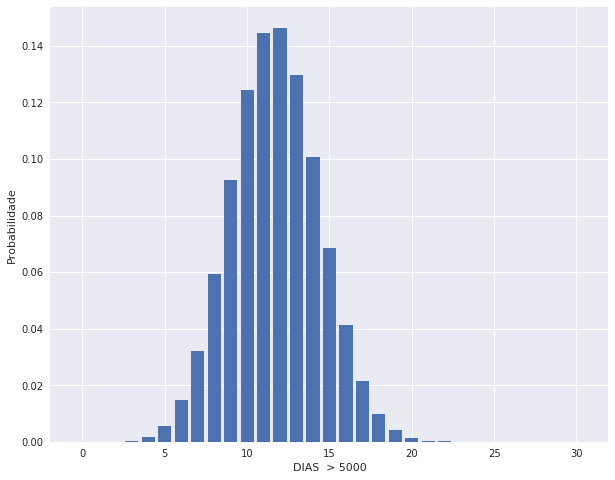

In [506]:

# Mostrar cada número de dias está  provavelmente entre os dias 10 e 15.
plt.bar(outcome_counts, outcome_probs)

plt.xlabel('DIAS  > 5000')
plt.ylabel('Probabilidade')

plt.show()



Descrição:

    Gere uma distribuição binomial e, em seguida, encontre as probabilidades para cada valor em issue_counts.
    
    Use N = 30 e p = .39, como estamos fazendo isso para os dados de bikesharing.
    Traçar os dados resultantes como um gráfico de barras.


In [480]:
#N= A quantidade total de eventos
#p = a probabilidade dos resultados esperados.

#Na PMF
#
#x: A lista de saída - outcomes_prob,
#n: A quantidade total de eventos
#p: a probabilidade dos resultados esperados.

from scipy import linspace
from scipy.stats import binom

N=30
p=.39
# CCriar um arranjo de elementos de 0 a 30 = 31 elementos
outcome_counts_2 = linspace(0,30,31)
#verificando valores
##print(outcome_counts_2)
# Criando a distribuição binomial das probabilidades, uma cara cada item do outcome_counts_02
dist = binom.pmf(outcome_counts_2,N,p)
#verificando valores
print(dist)


[  3.62990326e-07   6.96227346e-06   6.45436990e-05   3.85146007e-04
   1.66212601e-03   5.52588777e-03   1.47206027e-02   3.22681127e-02
   5.93124940e-02   9.26960288e-02   1.24455816e-01   1.44672930e-01
   1.46451696e-01   1.29645764e-01   1.00650048e-01   6.86400329e-02
   4.11418230e-02   2.16619435e-02   1.00023728e-02   4.03892189e-03
   1.42024384e-03   4.32392740e-04   1.13092289e-04   2.51495325e-05
   4.68976938e-06   7.19610515e-07   8.84767027e-08   8.38030699e-09
   5.74060842e-10   2.53118969e-11   5.39433869e-13]


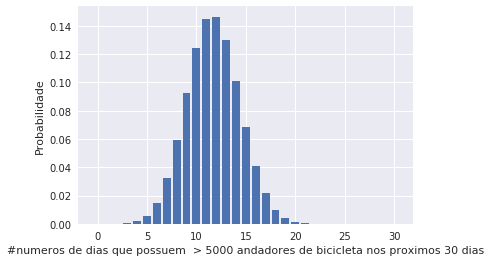

In [481]:

# Mostrar cada número de dias está  provavelmente entre os dias 10 e 15.
plt.bar(outcome_counts, outcome_probs)

plt.xlabel('#numeros de dias que possuem  > 5000 andadores de bicicleta nos proximos 30 dias')
plt.ylabel('Probabilidade')
plt.show()


Descrição:

     Calcule a média para os dados de compartilhamento das bikes, onde N = 30 e p = .39.
     Atribua o resultado a dist_mean.

In [482]:
#cAlculando a média da distribução
dist_mean= 30*.39
print(dist_mean)

11.7


Descrição:

     Calcule o desvio padrão para os dados de bikesharing, onde N = 30 e p = .39.
     Atribua o resultado a dist_stdev.
     


In [483]:
#Calculando o Desvio Padrao
dist_stdev = (N*p*(1-p))**0.5
print(dist_stdev)

2.67151642331


<h3> Densidade Cumulativa</h3>
<p>
Descrição:

    Crie uma distribuição cumulativa onde N = 30 e p = .39 e gere um gráfico de linha da distribuição.
</p>

In [485]:
from scipy import linspace
from scipy.stats import binom
# Arranjo de de valores de 0 a 30/ criado anteriormente

# Criando as probabilidade cumlativas, um para cada entrada em outcome_counts

dist_cum = binom.cdf(outcome_counts,30,0.39)
print(dist_cum)

[  3.62990326e-07   7.32526378e-06   7.18689628e-05   4.57014970e-04
   2.11914098e-03   7.64502875e-03   2.23656314e-02   5.46337441e-02
   1.13946238e-01   2.06642267e-01   3.31098083e-01   4.75771013e-01
   6.22222709e-01   7.51868472e-01   8.52518521e-01   9.21158554e-01
   9.62300377e-01   9.83962320e-01   9.93964693e-01   9.98003615e-01
   9.99423859e-01   9.99856251e-01   9.99969344e-01   9.99994493e-01
   9.99999183e-01   9.99999903e-01   9.99999991e-01   9.99999999e-01
   1.00000000e+00   1.00000000e+00   1.00000000e+00]


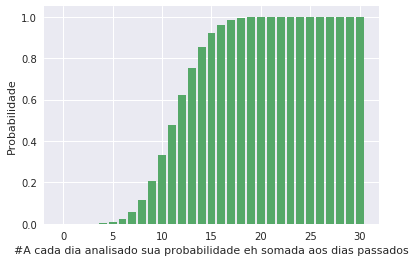

In [488]:
plt.bar(outcome_counts, dist_cum)

plt.xlabel('#A cada dia analisado sua probabilidade eh somada aos dias passados')
plt.ylabel('Probabilidade')
plt.show()

Descrição:

    Encontre a probabilidade para a esquerda de k = 16 (incluindo 16) quando N = 30 e p = .39.
        Atribua o resultado para left_16.
    Encontre a probabilidade para a direita de k = 16 quando N = 30 e p = .39.
        Atribua o resultado a right_16.

In [514]:
#K= DIAS A SEREM VISUALIZADOS
k=16
#  A soma de todas as probabilidades a esquerda de k e k também é.
left_16 = binom.cdf(k,N,p)

 # A soma de todas as probabilidades a direita de k é.
right_16 = 1 - left

print(left, right)

(0.96230037660548828, 0.037699623394511717)


<h3>Distribuição Geometrica</h3>

[  0.00000000e+00   3.90000000e-01   2.37900000e-01   1.45119000e-01
   8.85225900e-02   5.39987799e-02   3.29392557e-02   2.00929460e-02
   1.22566971e-02   7.47658521e-03   4.56071698e-03   2.78203736e-03
   1.69704279e-03   1.03519610e-03   6.31469621e-04   3.85196469e-04
   2.34969846e-04   1.43331606e-04   8.74322797e-05   5.33336906e-05
   3.25335513e-05   1.98454663e-05   1.21057344e-05   7.38449800e-06
   4.50454378e-06   2.74777171e-06   1.67614074e-06   1.02244585e-06
   6.23691970e-07   3.80452101e-07   2.32075782e-07]


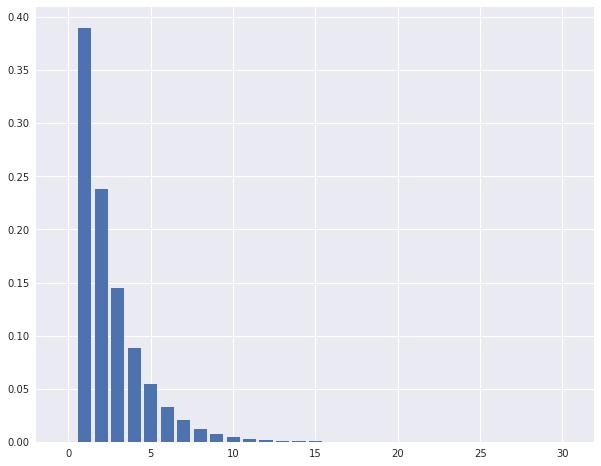

In [641]:
from scipy import linspace
from scipy.stats import geom

# Arranjo de de valores de 0 a 30/ criado anteriormente outcome_counts = linspace(0,30,31)

outcome_probs_gm = geom.pmf(outcome_counts,0.39)
print(outcome_probs_gm)
plt.bar(outcome_counts, outcome_probs_gm)
plt.show()

<h3>Distribuição Hipergometrica</h3>

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
(array([ 0.40333824,  0.41905272,  0.15311542,  0.02325804,  0.00123558,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ]), ';;;;', <scipy.stats._distn_infrastructure.rv_frozen object at 0x99afccec>)


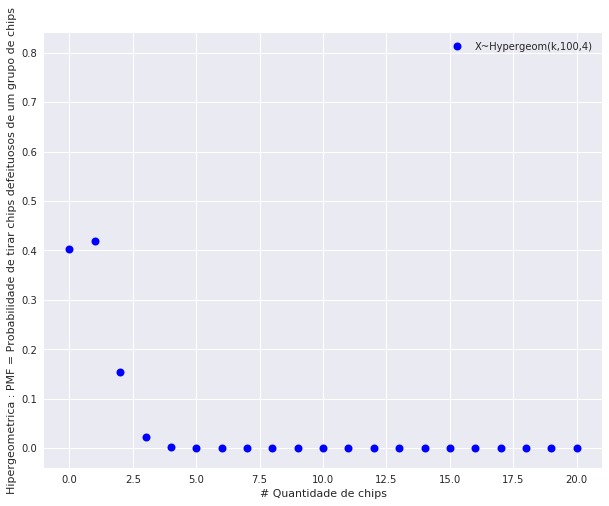

In [670]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
#M 100 chips, x = 1,2,3 ...20 chips com defeito , N existem 4 com defeitos


[M, n, N] = [100, 20, 4]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
print(x)
#P
pmf_chip = rv.pmf(x) #PMF de cada possibilidade de erro em x

print(pmf_chip,";;;;",rv) # verificando valores


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_chip, 'bo', ms=8, label ='X~Hypergeom(k,100,4)')
#Eixo y = 08
ax.vlines(x, 0.8, pmf_chip, lw=0, alpha=0.5)
ax.set_xlabel('# Quantidade de chips')
ax.set_ylabel('Hipergeometrica : PMF = Probabilidade de tirar chips defeituosos de um grupo de chips')
ax.legend(loc='best', frameon=False)
plt.show()



(array([ 0.40333824,  0.82239096,  0.97550638,  0.99876442,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,  1.        ]), <scipy.stats._distn_infrastructure.rv_frozen object at 0x97dc204c>)


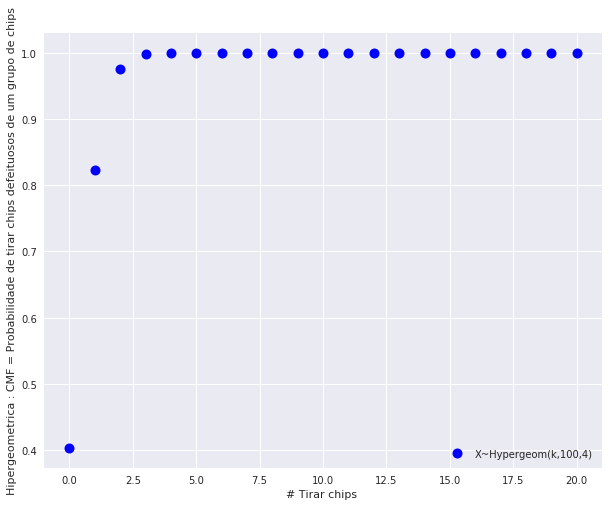

In [669]:
cdf_chip = rv.cdf(x)
print(cdf_chip,rv)


fig = plt.figure()
ax1 = fig.add_subplot(111)
ay = fig.add_subplot(111)
ax1.plot(x, cdf_chip, 'bo', ms=10, label='X~Hypergeom(k,100,4)')
#Eixo y = 08
ax1.vlines(x, 0.8, cdf_chip, colors='b', lw=0, alpha=0.5)
ax1.set_xlabel('# Tirar chips ')
ax1.set_ylabel('Hipergeometrica : CMF = Probabilidade de tirar chips defeituosos de um grupo de chips')
ay.legend(loc='best', frameon=False)
plt.show()

<h3>Distribuição de Poison</h3>

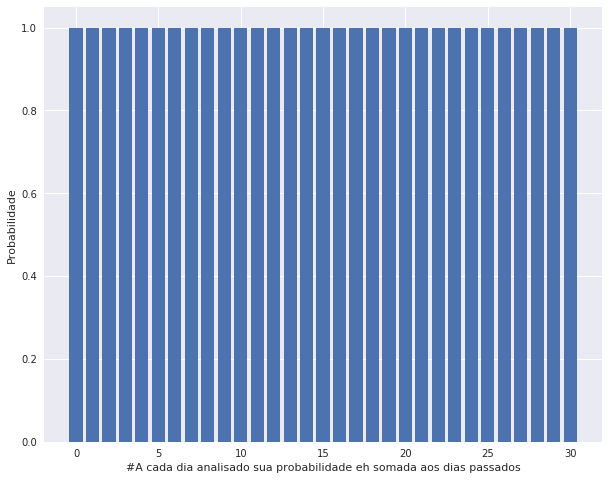

In [740]:
#CDF
mu = 1
x = linspace(0,30,31)


plt.bar(x, mu)
plt.xlabel('#A cada dia analisado sua probabilidade eh somada aos dias passados')
plt.ylabel('Probabilidade')
plt.show()


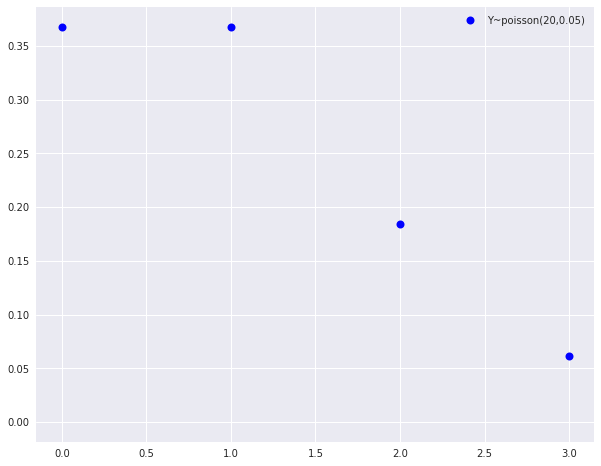

In [729]:
from scipy.stats import poisson
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
N=20
p=.05
#mu = n*p

mu = N*p
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(poisson.ppf(0.01, mu),
           poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='Y~poisson(20,0.05)')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=0, alpha=0)

rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='b', lw=0)
ax.legend(loc='best', frameon=False)


mean, var, skew, kurt = binom.stats(N, p, moments='mvsk')

x1 = np.arange(binom.ppf(0.01, N, p),
              binom.ppf(0.99, N, p))
ax1.vlines(x1, 0, binom.pmf(x1, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
ax1.vlines(x1, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
      label='frozen pmf')
ax1.legend(loc='best', frameon=False)
plt.show()




In [533]:
#e =ou - 2,718
e=2
la = 1
print(la)

poisson.pmf = e**(la)
#poisson.pmf(outcome_counts) = e(-mu) * mu**outcome_counts / outcome_counts!

1


AttributeError: 'builtin_function_or_method' object has no attribute 'pmf'